In [1]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Day 02 - MATH/PHYS 241

If we are performing an experiment and collecting data, then we will always want to give two values: the measured value and the uncertainty in the measured value. For example, let's say we are doing an experiment at sea where we are collecting sea surface temperature data over time. Then, at a minimum, we will need to collect and report the following for every sample measured:

* Sample ID #
* Time of sample collection
* Temperature measured (generally $^{\circ}\text{C}$)
* Temperature uncertainty (generally 1$\sigma$)

If we use these measurements to estimate other values of interest, we will need to know how different sources of uncertainty combine to give us a final uncertianty in an estimated value.

Therefore, it is important to know something about measurement theory and how to treat uncertainties in our calculations.  

# Accuracy and Precision

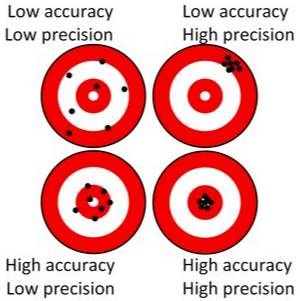

In non-science settings, the terms accuracy and precision maybe interchangable. However, in science, accuracy and precision have specific meanings.

The picture above illustrates the difference between accuracy and precision.

**Accuracy** refers to how close a measured value is to the "true" or accepted value. In the example above, it refers to how close each shot is to the bullseye. The closer to the bullseye, the higher the accuracy.

**Precision** refers to how close a series of measured values are to eachother. In the example above, it refers to how close the shot groupings are relative to eachother. The more "clumped" the grouping, the higher the precision.

Clearly, we would like to have high accuracy, high precision measurements. So what does that look like in practice?

Let's say we are interested in measuring the width of a computer monitor using a meter stick.

If we measure the value once, we only have one value to report. How do we know if that value is reliable?

The easiest way to safeguard against this is by taking multiple measurements. You might think we can simply take more and more measurements to increase the accuracy and precision of our final result, but there is a flaw in that logic:

1) it assumes small errors between measurements will cancel out.

2) it assumes the measurement device/technique is not flawed.

For instance, if the meter stick was made such that distance between centimeter increments was off by a millimeter, then any measurement made would be incorrect due to this miscalibration.

## Systematic vs Random Errors

Precision and accuracy are closely related to the concepts of systematic and random errors.

A **systematic** error is a reproducible discrepency. It causes measurements to be different from the "true" value and directly impacts accuracy. For example, if we are using a meterstick that was damaged on one end (say, a hungry undergrad was nibbling on the end), then any measurement made from that end would result in an incorrect value. No amount of repeated measurements will improve the mean result to a more accurate value. The good news is systematic error can be corrected through calibration standards.

**Random** errors are due to fluctuations in the enviornment between repeated measurements. As we design an experiment, we try our best to produce an environment that maintains identical conditions between measurements. However, there are certain circumstances that are out of our control and result in fluctuations between measurements. This type of error impacts precision. If the error is truely random, we can obtain an accurate average result by taking sufficient repeated measurements such that the random errors essentially cancel out.

## Computational Error

Even with using a computer to assist us with our calculations, you may be surprised to learn that there are *more* ways in which errors can pop up.

**Approximation** erros occur when we simplify the mathematics so we can solve problems numerically. For example, we cannot actually sum to infinity. The Taylor Series expansion for $\sin(x)$ (note: also known an Maclaurin Series for $\sin(x)$):

$$
\begin{align}
\sin(x)_{exact} &= \sum^{\infty}_{n=1} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} \tag{1}
\end{align}
$$

But, if we want to solve for the expression numerically:

$$
\begin{align}
\sin(x) &\approx \sum^{N}_{n=1} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} \tag{2}
\end{align}
$$

The result for $\sin(x)_{exact}$ can be expressed as our approximate result (eq. 4) plus an error term $\varepsilon(x,N)$ that represents the series from $N+1$ to $\infty$:

$$
\begin{align}
\sin(x)_{exact} &= \sin(x) + \varepsilon(x,N) \tag{3}
\end{align}
$$

Hopefully it is clear that for *reasonable* approximations, the approximation error $\varepsilon(x,N)$ should decrease as $N$ increases. Therefore, we can improve our numerical approximation by increasing the number $N$ at the expense of doing more computations.

Okay, if that's the case, why don't we just do more and more calculations until $\varepsilon(x,N) = 0$? Two reasons:

1) Computational efficiency is something that will become important at some point. It is bad practice to have computationally inefficient programs. If we are sloppy with our programing, we may exceed the maximum memory or have our calculations take too long to complete.

2) Roundoff error may eventually become the dominating contribution to error, and further calculations will only make it worse.

**Roundoff** error occurs due to the way in which floating-point numbers are stored in memory on a computer. There are only so many digits that the computer can actually store for a single number. We are not going to go into the details of [floating-point arithmetic](https://en.wikipedia.org/wiki/Floating-point_arithmetic), but it is important to note the computer will simply truncate numbers if they are too large (known as *overflow*) or too small (known as *underflow*).

# Class Problem 1

I have included a function below `taylor_sin` that will calculate $\sin(x)$ based off the Taylor Series expansion above. We can use it to calculate the value of $\sin(x)$ as we increase the number of terms to include in the expansion $N$.

You'll note that the function does not calculate the error term $\varepsilon(x,N)$. However, this is easy to find if we compare the function output to a known value such as $\sin(\frac{\pi}{6}) = 0.5$

Use `taylor_sin` to calculate the error $\varepsilon(x,N)$ for $N = 1 \to 10$. Print out a table of the result.


In [2]:
def taylor_sin(x, terms):
    """
    Calculate sine of x using Taylor series expansion.

    Parameters:
    x (float): The input value (in radians).
    terms (int): The number of terms to include in the series.

    Returns:
    float: The sine of x.
    """
    sine = 0
    for n in range(terms):
        term = ((-1)**n) * (x**(2*n + 1)) / math.factorial(2*n + 1)
        sine += term
    return sine

# Example usage:
# N = 10  # number of terms to include in Taylor Series
# x = math.radians(30)  # Convert 30 degrees to radians
# print(0.5 - taylor_sin(x, N))  #  Output: 5.551115123125783e-17

# The Normal Distribution

Measurement theory relies on our understanding of statistics. A good place to begin is with the idea of a distribution.

Consider a *parent* population and a sample we might draw from it.

If we draw every possible sample from the parent distribution (typically $\infty$), we can recreate the exact distribution of the parent population.

In practice, we can't take $\infty$ samples. Instead, we take $N$ samples and create a *sample* distribution.

If practically all of the systematic errors in our measurement process have been removed, then the random errors will likely produce a *Normal* distribution.





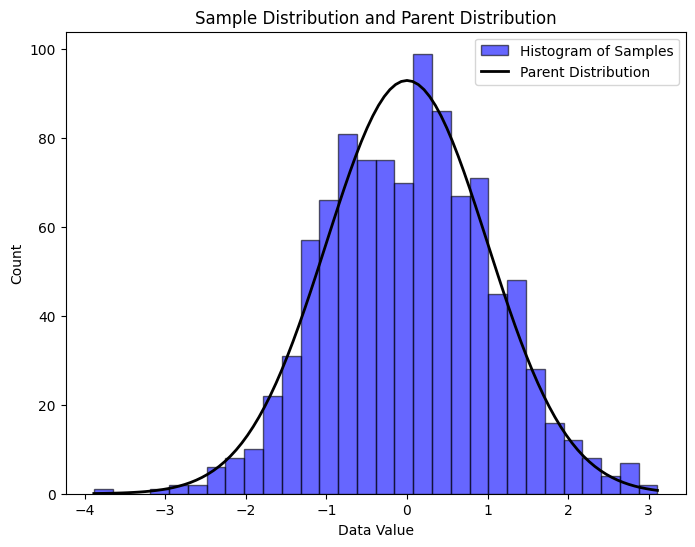

In [3]:
"""
This will give you an array of N random samples from a normal distribution
with a specified mean and a standard deviation.
"""

# Parameters for the normal distribution
mean = 0
stdev = 1
N = 1000   # number of samples to draw

# Generate an array of N random samples
random_sample = np.random.normal(mean, stdev, N)

# Create the plot
bins = 30 # define the number of bins in histogram
plt.figure(figsize=(8, 6))
plt.hist(random_sample, bins, alpha=0.6, color='b', edgecolor='black', label='Histogram of Samples')

# Add labels and title
plt.xlabel('Data Value')
plt.ylabel('Count')
plt.title('Sample Distribution and Parent Distribution')

# Generate data for the normal distribution curve
x = np.linspace(min(random_sample), max(random_sample), 100)  # Create a range of x-values
p = stats.norm.pdf(x, mean, stdev)  # Calculate the probability density function (PDF)

# Plot the curve (black line with width 2)
plt.plot(x, p*len(random_sample)*(max(random_sample)-min(random_sample))/bins, 'k', linewidth=2, label='Parent Distribution')

plt.legend()
plt.show()

The above is a histogram plot of $N$ data points distributed across a specified number of bins. Each bin has the same width (also called the *span*) and the y-axis gives the count of how many data points fit into a specific bin. We have also included the parant distribution that the sample distribution is drawn from.



## Mean/Median/Mode

We are already familiar with some widely used statistical concepts. The **sample mean** (eq. 4) of a group of measurements is given by:


$$
\begin{align}
\bar{x} &= \frac{1}{N} \sum^N_{i=1} x_i \tag{4} \\
\end{align}
$$

If we were to find every sample from the distribution, we could find the **parent population mean**:

$$
\begin{align}
\mu &= \lim_{N \rightarrow \infty } \left( \frac{1}{N} \sum^N_{i=1} x_i \right) \tag{5} \\
\end{align}
$$

Both $\mu$ and $\bar{x}$ are commonly used as symbols for mean, *but* if we are strict with our definintions, $\mu$ is specifically for the *parent distribution* while $\bar{x}$ is for the *sample distribution*.

The **median** ($\mu_{\frac{1}{2}}$) is a number that locates the "middle" of the distribution. Exactly half of the data points are below this value and half above.

The **mode** is the value that appears most often in a set of values. Another way to say this, is the mode repesent the data point most likely sampled.

Base Python does not have built in functions for `mean`, `median`, or `mode`; but we can use the [statistics](https://docs.python.org/3/library/statistics.html) library if we are interested in calculating these values.

It is worth noting that other libraries (e.g., numpy and scipy)  have statistics functions, but may not have a particular function (for example, scipy.stats.mean(x) is not a function and will not return the mean of x). You can use whatever library you want as long as it does the job correctly. Below I have created output for several functions.

**Why does the `statistics.mode` function produce a different result compared to `np.mode` and `scipy.stats.mode`? Which is *correct*?**


In [4]:
# comparision of mean calculations
print('Statistics Mean:', statistics.mean(random_sample))
print('Numpy Mean:', np.mean(random_sample))
#print('Scipy Stats Mean:', stats.describe(random_sample))

# line separation between sections
print('--------------------')

# comparison of median calculations
print('Statistics Median:', statistics.median(random_sample))
print('Numpy Median:', np.median(random_sample))

# line separation between sections
print('--------------------')

# comparison of mode calculations
print('Statistics Mode:', statistics.mode(random_sample))
print('Numpy Mode:', stats.mode(random_sample))
print('Scipy Stats Mode:', stats.mode(random_sample))


Statistics Mean: 0.028660324004898288
Numpy Mean: 0.028660324004898284
--------------------
Statistics Median: 0.06476941989767895
Numpy Median: 0.06476941989767895
--------------------
Statistics Mode: -0.6822372416956725
Numpy Mode: ModeResult(mode=np.float64(-3.8844853555051118), count=np.int64(1))
Scipy Stats Mode: ModeResult(mode=np.float64(-3.8844853555051118), count=np.int64(1))


## Variance and Standard Deviation

Two other statistical terms you have likely come across at some point are **variance** and **standard deviation**.

From probability theory, variance is a measure of the extent to which a set of numbers is spread out relative to its average.

Similar to our discussion above defining *sample mean* and *parent population mean*, we should also define the varaince in terms of the sample dataset or the parent population.

If we have a dataset consisting of some number of observed measurements, then the variance of the dataset is the *sample variance*, $S^2$. If every possible measurement has been made and is present in the dataset, then the varaince is the *population variance*, $\sigma^2$.

Standard deviation is defined as the square root of the variance. Therefore, *sample standard deviation* is then $S$ and *population standard deviation* is $\sigma$.

The equation for *sample varaince* is defined as:

$$
\begin{align}
S^2 &= \frac{1}{N-1} \sum^N_{i=1}(x_i - \bar{x})^2\tag{6}
\end{align}
$$

While the equation for *sample standard deviation* is defined as:

$$
\begin{align}
S &= \sqrt{\frac{\sum^N_{i=1}(x_i - \bar{x})^2}{N-1}} \tag{7}
\end{align}
$$

It is worth noting *why* we include the $N-1$ in the above equations instead of just $N$. The reason comes from the idea of *Degrees of Freedom*. We have used 1 degree of freedom by defining the data in terms of the mean ($\bar{x}$), so we subtract 1 to account for this loss. Another way to reason why this makes since is if we have a dataset of 1 data point. The mean is then exactly equal to this value, but it doesn't make sense to have a varaince or standard deviation anymore. So, instead of reporting 0 for those values, using $N-1$ makes them *undefined* since we are dividing by 0 in the equations.

A final thing to note, is if we are collecting data in the real world, we almost never have every datapoint available to measure. Therefore, we *should* use $S$ for our symbol of standard deviation, but we are far more familiar with seeing $\sigma$ used to report standard deviation... what gives? If we are almost always referring to *sample standard deviation* instead of *population standard deviation*, why are we using $\sigma$?

The answer to which is... because the $\sigma$ symbol is cooler to write down???

I can only guess as to why science reports standard deviation using $\sigma$, but two possible reasons are:
* As long we we make *enough* measurements, the sample standard deviation should be close to the population standard deviation.
* $S$ can have many other meanings across the sciences while $\sigma$ is much less common, so we use $\sigma$ as the universal symbol for standard deviation.

So, from here on out, assume $\sigma$ and $\sigma^2$ refer to *sample standard deviation* and *sample variance* unless otherwise noted.

In [5]:
# comparision of variance calculations
print('Statistics Variance:', statistics.variance(random_sample))
print('Numpy Variance:', np.var(random_sample, ddof=1))

# line separation between sections
print('--------------------')

# comparison of stdev calculations
print('Statistics Stdev:', statistics.stdev(random_sample))
print('Numpy Stdev:', np.std(random_sample, ddof=1))

Statistics Variance: 1.0643094963601287
Numpy Variance: 1.0643094963601287
--------------------
Statistics Stdev: 1.0316537676760207
Numpy Stdev: 1.0316537676760207


If we have data that is approximately normally distributed, then we can make the following statements:

* $\mu \pm \sigma$ constains approximately 68% of the measurements
* $\mu \pm 2\sigma$ constains approximately 95% of the measurements
* $\mu \pm 3\sigma$ constains nealry all of the measurements

The plot below helps illustrate these statements.

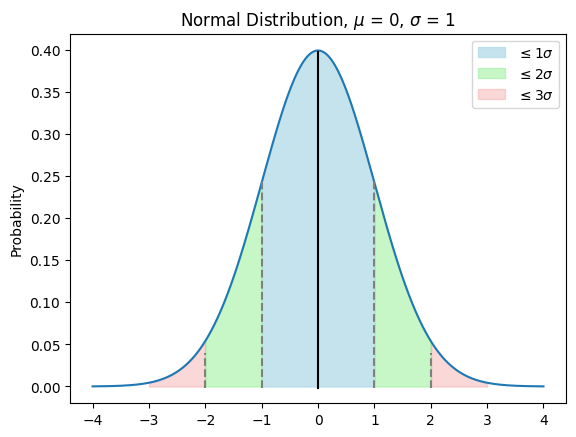

In [6]:
# Generate x-values for the plot
x = np.linspace(-4, 4, 1000)

# Calculate the corresponding y-values using the probability density function (PDF)
y = stats.norm.pdf(x, 0, 1)  # Mean = 0, Standard Deviation = 1

# Create the plot
plt.plot(x, y)

# Shade the regions
plt.fill_between(x, y, where=((x > -1) & (x < 1)), color='lightblue', alpha=0.7, label=r'$\leq 1 \sigma$')
plt.fill_between(x, y, where=((x > -2) & (x < -1)), color='lightgreen', alpha=0.5, label=r'$\leq 2 \sigma $')
plt.fill_between(x, y, where=((x > 1) & (x < 2)), color='lightgreen', alpha=0.5)
plt.fill_between(x, y, where=((x > -3) & (x <-2)), color='lightcoral', alpha=0.3, label=r'$\leq 3 \sigma$')
plt.fill_between(x, y, where=((x > 2) & (x < 3)), color='lightcoral', alpha=0.3,)

def find_y_on_curve(x_val):
  # Calculate the PDF value
  pdf_value = stats.norm.pdf(x_val, 0, 1)
  # Normalize the PDF value to be between 0 and 1
  max_pdf = stats.norm.pdf(0, 0, 1)  # Maximum PDF value at the mean
  normalized_pdf = pdf_value / max_pdf
  return normalized_pdf

# Add vertical lines
plt.axvline(0, color='black', linestyle='-', ymin = 0.04, ymax=.95)
plt.axvline(1, color='gray', linestyle='--', ymin = 0.04, ymax=find_y_on_curve(1))
plt.axvline(-1, color='gray', linestyle='--', ymin = 0.04, ymax=find_y_on_curve(-1))
plt.axvline(2, color='gray', linestyle='--', ymin = 0.04, ymax=find_y_on_curve(2))
plt.axvline(-2, color='gray', linestyle='--', ymin = 0.04, ymax=find_y_on_curve(-2))

# Add labels and title
# plt.xlabel('X-axis')
plt.ylabel('Probability')
plt.title(r'Normal Distribution, $\mu$ = 0, $\sigma$ = 1')

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Testing a Normal Distribution

Many of the assumptions we would like to make require that the data is from a normal distribution. Therefore, we need an answer to: *is my data normal*?

This question is more difficult to answer than it may seem. We will get to more robust methods of testing a distribution for normality, but we will first inspect the distribution visually.

Your initial instinct may be to make a histogram plot (like the figures above) and have a normal distribution plotted along with it to compare against.

However, this is not a very good indicator that the data match a particular distribution since the shape *heavily* depends on how many bins we include.

A much better visual indicator is to produce something called a [probability plot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) (or sometimes called a [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) or quantile-quantile plot). In a Q-Q plot, data points are converted to [quantiles](https://en.wikipedia.org/wiki/Quantile), which are plotted against an expected theoretical distribution's quantiles. If the two distributions are similar, then data points will fall along the line of equality (y = x).

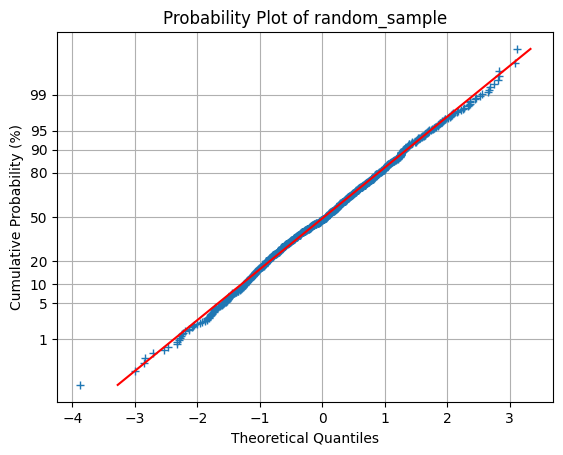

In [7]:
# Calculate quantiles and least-square-fit curve
(quantiles, values), (slope, intercept, r) = stats.probplot(random_sample, dist='norm')

#plot results
plt.plot(values, quantiles,'+')
plt.plot(quantiles * slope + intercept, quantiles, 'r')

#define ticks
ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]

#transform ticks from precentile to cumulative density
ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]

#assign new ticks
plt.yticks(ticks_quan,ticks_perc)

# Add labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Cumulative Probability (%)')
plt.title('Probability Plot of random_sample')

#show plot
plt.grid()
plt.show()

From the probability plot, we can see that nearly all of the data points overlap with the straight line, which indicates the data match well with a normal distribution.

In practice, if we are performing many measurements, we will likely see the data deviate from the straight line at the tails. This just means we have more extreme events occur than what a pure normal distribution would suggest.

This regularly happens in experimental science. Extreme events occur infrequently and will bias your data far more than typical outliers. We will discuss how to handle outliers later.

## Standardization and Normalization

Let's say we take a bunch of measurements of some value of interest. A valid question then becomes: *how likely is a particular measurement*?

To answer this, we will want to use some of the above statistical methods, which means we need to get our data in *standard form*, from which we can calculate the [standard score](https://en.wikipedia.org/wiki/Standard_score).

The standard score is also called the *z-score*.

To calculate the *z-score* for each data point, we subtract the mean and divide by the standard deviation for that population (or sample):

$$
\begin{align}
z_i &= \frac{x_i - \bar{x}}{\sigma} \tag{8}
\end{align}
$$

We can then make a histogram plot of the standardized values, which makes it easy to see how far away from the mean particular values are and whether or not they may be considered outliers.

For example, let's start with a 1000 random samples drawn from a normal distribution of $\mu = 14.2$ and $\sigma = 4.7$.


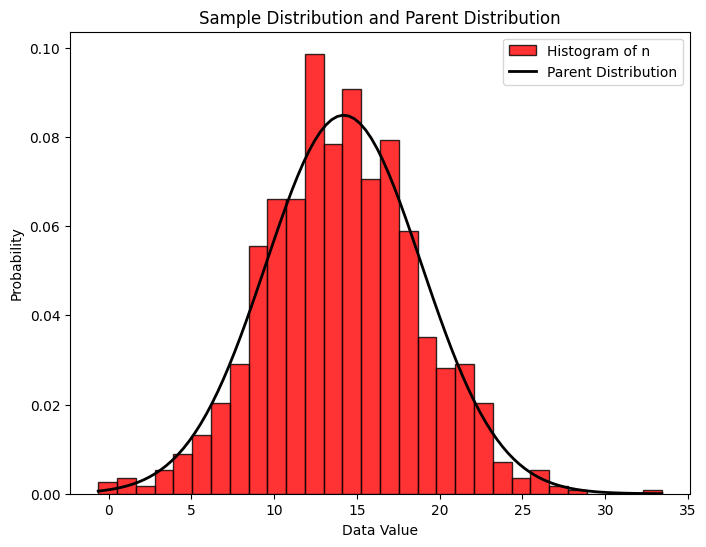

In [8]:
# Parameters for the normal distribution
u = 14.2
std = 4.7
N = 1000   # number of samples to draw

# Generate an array of N random samples
n = np.random.normal(u, std, N)

# Create the plot
bins = 30 # define the number of bins in histogram
plt.figure(figsize=(8, 6))
plt.hist(n, bins, alpha=0.8, density = True, color='r', edgecolor='black', label='Histogram of n')

# Add labels and title
plt.xlabel('Data Value')
plt.ylabel('Probability')
plt.title('Sample Distribution and Parent Distribution')

# Generate data for the normal distribution curve
x = np.linspace(min(n), max(n), 100)  # Create a range of x-values
p = stats.norm.pdf(x, u, std)  # Calculate the probability density function (PDF)

# Plot the curve (black line with width 2)
plt.plot(x, p, 'k', linewidth=2, label='Parent Distribution')

plt.legend()
plt.show()

Next, we can use `scipy.stats.zscore()` to calculate the standardized values, which we can create another histogram plot for.

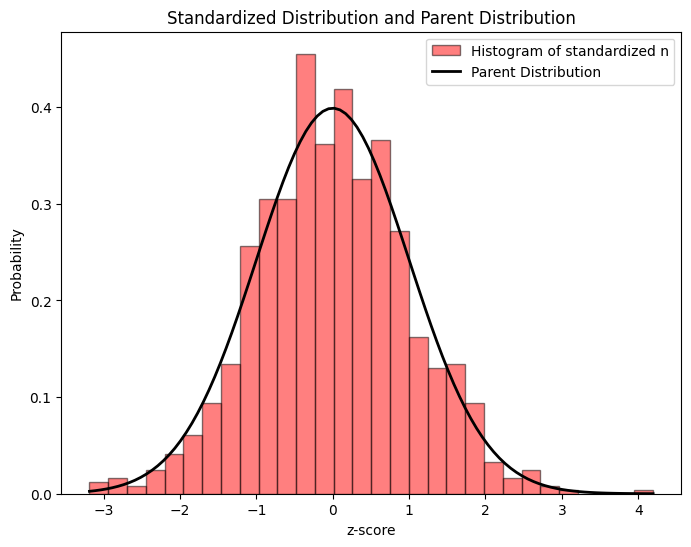

In [9]:
# find z-score values
zscores = stats.zscore(n)

# Create the plot
bins = 30 # define the number of bins in histogram
plt.figure(figsize=(8, 6))
plt.hist(zscores, bins, alpha=0.5, density = True, color='r', edgecolor='black', label='Histogram of standardized n')

# Add labels and title
plt.xlabel('z-score')
plt.ylabel('Probability')
plt.title('Standardized Distribution and Parent Distribution')

# Generate data for the normal distribution curve
x = np.linspace(min(zscores), max(zscores), 100)  # Create a range of x-values
p = stats.norm.pdf(x, 0, 1)  # Calculate the probability density function (PDF)

# Plot the curve (black line with width 2)
plt.plot(x, p, 'k', linewidth=2, label='Parent Distribution')

plt.legend()
plt.show()


It should be clear that by standardizing data, we shift the distribution such that is has a mean of 0 and and standard deviation of 1.

*Normalizing* data is something we can also do, but it is not the same thing as standardizing data. When we normalize a dataset, we generally transform the data so that the length is over a desired range (this is sometimes called [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling)):

$$
\begin{align}
\hat{x_i} &= \frac{x_i - \min{(x)}}{\max{(x)} - \min{(x)}} \tag{9}
\end{align}
$$

Be careful when stating whether data is *standardized* or *normalized*. It is common to hear the terms used interchangeably, even though they are different processes!


## Calculating Probabilities

A question you could feasibly want an answer to is: *how likely is a particular measurement?*

This seems like a simple question, but we can get a more useful result if we rephrase the question to: *how likely is a measurement to be less (or more) than a particular value?*

For example, let's use the same mean ($\mu = 14.2$) and standard deviation ($1\sigma = 4.7$) as the last problem. How likely is it to measure a value less than 3?  

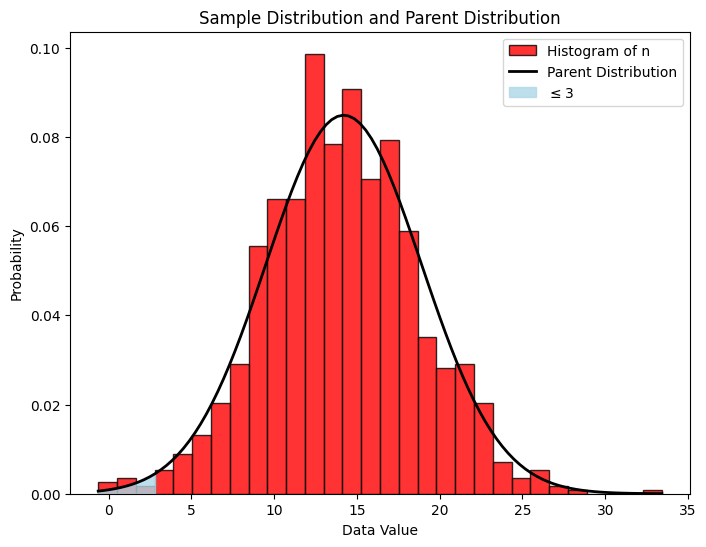

In [10]:
# Create the plot
bins = 30 # define the number of bins in histogram
plt.figure(figsize=(8, 6))
plt.hist(n, bins, alpha=0.8, density = True, color='r', edgecolor='black', label='Histogram of n')

# Add labels and title
plt.xlabel('Data Value')
plt.ylabel('Probability')
plt.title('Sample Distribution and Parent Distribution')

# Generate data for the normal distribution curve
x = np.linspace(min(n), max(n), 100)  # Create a range of x-values
p = stats.norm.pdf(x, u, std)  # Calculate the probability density function (PDF)

# Plot the curve (black line with width 2)
plt.plot(x, p, 'k', linewidth=2, label='Parent Distribution')

# Shade the region less than x = 3 below the parent distribution
plt.fill_between(x, p, where=(x < 3), color='lightblue', alpha=0.8, label=r'$\leq 3$')

plt.legend()
plt.show()


From the plot, we can see the shaded region where $x \leq 3$ represents a fairly small area under the total curve. The probability of measuring a value in this shaded region is then the area of the shaded region divided by the total area under the curve.

Luckily, we don't need to perform this calculation by hand since scipy has a function that will calculate the value for us: `scipy.stats.norm.cdf()`, which is the Normal Cumulative Distribution Function.

The input for the function is: $x$ (value of interest), $\mu$, $\sigma$. If you do not include values for $\mu$ and $\sigma$, it will assume $\mu = 0$ and $\sigma = 1$.

The output of the function is the summed area under the normal curve between $-\infty$ and $x$.

In [11]:
# CDF for x = 3, u = 14.2, stdev = 4.7
a = stats.norm.cdf(3, 14.2, 4.7)
print(a)


0.008586593427952562


Put another way, we have less than a 1% chance to measure a value less than or equal to 3 in the above example.

**QUESTION**

What if we wanted to find the probability of measuring a value greater than 20?

In [12]:
# Type your code here!!!

## Rejecting Data

When collecting data you will have *flier* measurements, values that will bias your analysis. Even the most carefully executed experiments will contain outliers that must be dealt with using robust methods.  

***Assuming the data is from a normal distribution***, if we collect and measure 100 samples, then we'd expect to measure 1 value that is more than 2.6 standard deviations away from the mean. If we do not exclude this data point, then our mean measurement will be off by 0.026 (2.6/100). If our uncertainty in measurement is 0.1, then this is almost significant, but probably okay.

However, let's say the sample collection and measurement process is difficult and we can only measure 10 samples. If we have 10 rounds of the experiment, than we'd expect 1 of the rounds to contain a 1/100 flier. This results in the estimated mean to be off by 0.26!

So, what are we to do?

It is bad practice to arbitrarily discard data, and you will be reprimanded (*fired/discraced*) for doing so. Therefore, we need a systematic and repeatable way to go about identifying outliers.

It is worth noting there is no "golden-rule" to treat outliers across all of science. Different fields have different practices in place. If "enough" measurements have been made, then we can possibly rely on some multiple of the standard deviation from the mean.

If the data is normally distributed about the mean, one possible method to discard outliers is known as [Chauvenet's Criterion](https://en.wikipedia.org/wiki/Chauvenet%27s_criterion), which can be roughly stated as:

*If we make N measurements, than any data point with a z-score outside of 1 in 2N is an outlier*.

Let's work an example to see how to apply it.

An experiment consists of 10 sample measurements:

In [13]:
# Example Application of Chauvenet's Criterion

# data set
m = np.zeros(10)
m = m + (46, 48, 44, 38, 45, 47, 58, 44, 45, 43)

# find the mean and standard deviation of the set
m_mean = np.mean(m)
m_std = np.std(m, ddof=1)

print('m_mean:', "{:.2f}".format(m_mean))
print('m_std:', "{:.2f}".format(m_std))

print('------------------')

# calc the absolute value of the z-score for each data point
zscores = stats.zscore(m)

print(zscores)


m_mean: 45.80
m_std: 5.07
------------------
[ 0.04155858  0.4571444  -0.37402724 -1.62078469 -0.16623433  0.24935149
  2.53507349 -0.37402724 -0.16623433 -0.58182014]


The above calculates the z-scores for each value in the data set `m`.

The data set contains N descrete measurements (in this case, 10). If there were twice as many measurements, the probability of any single measurement would be:

$$
P = \frac{1}{2N} \tag{10}
$$

The total probability of an "extreme" measurement is then $P$. Remember that the normal distribution has two sides (to the left and right of the mean). So, to compare our z-scores (one-sided) to this probability (two-sided), we need to find $P_z$:

$$
P_z = \frac{1}{4N} \tag{11}
$$

Now that we have $P_z$, we can now find the maximum allowed deviation $D_{max}$ using `stats.norm.ppf()`, which is the *percent point function* (aka, the *inverse of the cumulative distribution function*, or [quantile function](https://en.wikipedia.org/wiki/Quantile_function) ).

In [14]:
# find the probability of an outlier measurement based on the number of data points
P_z = 1/(4*len(m))

# find the z-score associated with probability P_z
D_max = np.abs(stats.norm.ppf(P_z))

print(D_max)

1.9599639845400545


Note that we used the absolute value in the function to find $D_{max}$.We can now compare our z-scores directly against the value of $D_{max}$.

Outliers to be removed are:
- Any z-score that is less than negative $D_{max}$
- Any z-zcore that is greater than positive $D_{max}$

After removing outliers, we can recalculate values such as the mean and standard deviation.

In [15]:
# filter out data points with z-scores greater/less than D_max
m_filtered = m[np.abs(zscores) <= D_max]

print(m_filtered)

print('------------------')

# find the mean and standard deviation of the filtered set
filtered_mean = np.mean(m_filtered)
filtered_std = np.std(m_filtered, ddof=1)

print('filtered_mean:', "{:.2f}".format(filtered_mean))
print('filtered_std:', "{:.2f}".format(filtered_std))

[46. 48. 44. 38. 45. 47. 44. 45. 43.]
------------------
filtered_mean: 44.44
filtered_std: 2.88


Comparing the mean and standard deviation between the original data set and the filtered, we can see the mean changes a little while there is a more substatial change in the standard deviation by removing the outlier data point.

In [16]:
# compare the filtered and unfiltered mean and standard deviation
Delta_mean = m_mean - filtered_mean
Delta_std = m_std - filtered_std

print('Delta_mean:', "{:.2f}".format(Delta_mean))
print('Delta_std:', "{:.2f}".format(Delta_std))


Delta_mean: 1.36
Delta_std: 2.20


# Class Problem 2

In the course of a couple of hours, a nuclear engineer makes 12 measurements of the strength of a long-lived radioactive source with the following results, in millicuries:

12, 34, 22, 14, 22, 17, 24, 22, 18, 14, 18, 12

(Because the source has a long life, its activity should not change appreciably during the time all the measurements are made.)

**A)** Create a histogram and a Q-Q plot of the data. Be sure to include a correct title and axis labels in the plot.

**B)** Report the mean and standard deviation of the data set.

**C)** According to Chauvenet's criterion, are there outliers present in the data? If so, which data points are outliers and can be excluded from the data set?

**D)** Assuming outliers are removed, recalculate the mean and standard deviation of the data set.